

---


#**BCS 9.49 Neural Ciruits**   


**PSET2**

Due October 11, 11:59PM, 2022 



---







---



---

**NAME:**

<br>

email:



---

Please submit **both** the Colab notebook "Lastname_firsname.ipynb" **and** a (good) pdf copy on Canvas.


<br>

(no need to share your Colab)

data file: necker_cube_isi_data.npy


---





---


**Goals:**

To conduct stability analysis of a neural system using analytical and numerical methods from dynamical system theory. We will be dealing mostly with bistable systems.



---



---



In [2]:
pip install sympy

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.8/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import sympy as sp
import numpy as np
from matplotlib import pyplot as plt
import math

sp.init_printing()   # if you choose to use sympy

# if you want to use "display(Math('f_{answer}='+sp.latex(given_expr)))" to display sympy expressions
#from IPython.display import display, Math
#sp.init_printing(use_latex=True)



---



---



**Please change the name of this file as directed above!**



---



---



---



#PROBLEM 1: [ 40 points] Bistable Switch





---




Consider the case of a single neuron with an autapse,
with the rate-based equation for its synaptic dynamics $s(t)$ given by

$$\tau \frac{d s}{dt} = -s + f(s),$$

where $\tau$ is the synaptic time constant (units ms), and the transfer function $f(s)$ is a sigmoid given by 

$$f(s) = \frac{1}{1+e^{-w s - b}},$$ 
 
$w$ is the strength
of the autapse (unitless, since s is dimensionless), and $b$ is the sum of all external inputs to the cell (also dimensionless). For a given model, $\tau$, $w$ and $b$ are fixed parameters. In the following questions we will explore how the dynamics of the model change when we vary these parameters. 



---



##1.1 [6 points] Sigmoid function analysis
[(Graphical/visual/conceptual)]







---
### a.) 

Plot the curves $y=s$ and $y=f(s)$ as a function of $s$ for various values of the parameters $w$ while holding $b$ constant. 




For $w$, choose values between 0 and 10. Take $b = -w/2$.


<br>


From the plot, identify 

1.   the range of the function $f(s)$, and
2.   the (x,y) coordinates where $y=f(s)$ crosses the line ($y=s$)

 What is the effect of changing $w$? does this make sense with your intuitive understanding of $w$ as the weight of the autapse?

---




In [4]:
def sigmoid(s,w,b):
  return 1/(1+ np.exp(-w*s-b))

[ 2.50000000e+00  2.40000000e+00  2.30000000e+00  2.20000000e+00
  2.10000000e+00  2.00000000e+00  1.90000000e+00  1.80000000e+00
  1.70000000e+00  1.60000000e+00  1.50000000e+00  1.40000000e+00
  1.30000000e+00  1.20000000e+00  1.10000000e+00  1.00000000e+00
  9.00000000e-01  8.00000000e-01  7.00000000e-01  6.00000000e-01
  5.00000000e-01  4.00000000e-01  3.00000000e-01  2.00000000e-01
  1.00000000e-01 -2.22044605e-15 -1.00000000e-01 -2.00000000e-01
 -3.00000000e-01 -4.00000000e-01 -5.00000000e-01 -6.00000000e-01
 -7.00000000e-01 -8.00000000e-01 -9.00000000e-01 -1.00000000e+00
 -1.10000000e+00 -1.20000000e+00 -1.30000000e+00 -1.40000000e+00
 -1.50000000e+00 -1.60000000e+00 -1.70000000e+00 -1.80000000e+00
 -1.90000000e+00 -2.00000000e+00 -2.10000000e+00 -2.20000000e+00
 -2.30000000e+00 -2.40000000e+00 -2.50000000e+00]
[ 2.00669285e+00  1.90816257e+00  1.80995180e+00  1.71212843e+00
  1.61477403e+00  1.51798621e+00  1.42188127e+00  1.32659699e+00
  1.23229546e+00  1.13916572e+00  1.0474

Text(0, 0.5, 'y')

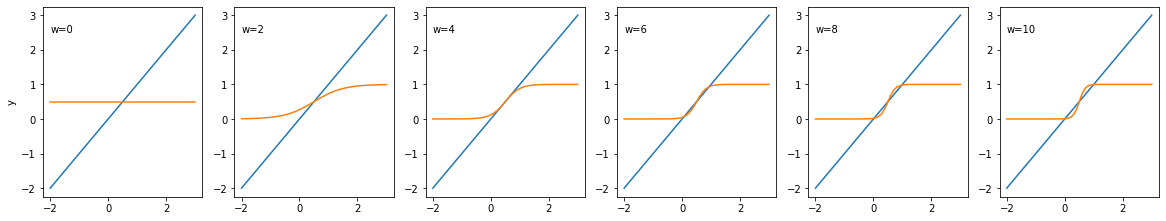

In [27]:
# plots for different w

w = np.arange(0,11,2)
s= np.arange(-2,3.1,.1)
b = -w/2
y_tot = np.zeros((2,w.shape[0],s.shape[0]))
y_tot[0,:,:] = s
comparison_array = np.zeros((w.shape[0],s.shape[0]))
f, axs = plt.subplots(1, 6,figsize=(20, 3.5))
for k in range(w.shape[0]):
    y_tot[1,k,:] = 1/(1+np.exp(-w[k]*s-b[k]))
    comparison_array = y_tot[1,k,:] - y_tot[0,k,:]
    
    axs[k].plot(s,y_tot[0,k,:])
    axs[k].plot(s,y_tot[1,k,:])
    axs[k].text(-2,2.5,'w='+str(w[k]))
axs[0].set_ylabel('y')



---


ANSWER:


---





---


###b.) 

Describe what happens as $b$ is varied and $w$ is held fixed at 4 ? Does this make sense with your intuitive understanding of b as including the feedforward input?


Choose $b$ to be in $(-2,2)$.



---



In [ ]:
# vary b

w = 4

s= np.arange(-3,3.1,.1)

b = np.arange(-2,3,1)



ANSWER:





---


##1.2 [6 points] Stability of the system: the case of $b = -w/2$

[analytical]

Assuming $b = −w/2$, analytically derive the threshold value $w^*$ above which
the system exhibits bistability and below which it does not.

Plot both $y=s$ and $y=f(s)$ for $w=6,4,2$.

Hint: What will be true about the slope of $y=f(s)$ when the it is tangent to $y=s$ at the crossing point?



---





---


ANSWER:





---






---


##1.3 [ 6 points] Bifurcation

[visual/graphical]



---







---
#### a.)

For two cases: $w=2< w^*$ and $w=6>w^*$, use graphical stability analysis to reason about the stability of the fixed points evident in your plot from 1.2. (Explain in words how you determined which fixed points are stable or unstable). Produce a new plot for each case plotting $𝑦=𝑠$ and $𝑦=𝑓(𝑠)$ as in 1.1. Add a green marker for the stable
fixed points, and a red marker for the unstable ones. There is no need to analytically solve for the coordinates of the fixed point(s), just visually estimate to get the markers in the right place. For example $(0.92, .92)$, $(0.07, 0.07)$ and $(0.5, 0.5)$ for the 3 fixed points when $w=6$.

---





---


ANSWER:

<br>







---





In [ ]:
# Your code here
#ax.plot(s1, f(s1,w), marker='o', markersize=12, markerfacecolor='green', markeredgecolor="black", label='stable' )


### b.) (conceptual)

Edit the legend for the plot below (replace the question marks) to correctly indicate which fixed points are stable and which are unstable.

 This plot illustrates why the
dynamical system is said to undergo a “pitchfork bifurcation” at $w^∗$.

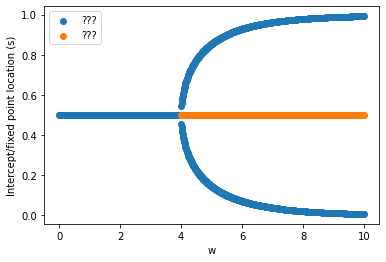

In [ ]:
def f(I):
  return np.exp(I)/(1+np.exp(I))

ws = np.arange(0, 10, .01)
S = np.arange(0, 1, .001)
bin2s = []
bin2_ws = []
bin1_s = []
bin1_ws = []
for w in ws:
  b_0 = -w/2
  label_text = 'b = '+str(b_0)
  I = w*S + b_0
  F = f(I)
  #plt.plot(S, F, label= label_text)

  diff = S-F
  signs = np.sign(diff)
  signs[signs==0]=1
  zero_crossings = np.where(np.diff(signs))[0] #from https://stackoverflow.com/questions/3843017/efficiently-detect-sign-changes-in-python
  intercepts = S[zero_crossings]
  #^^^ if the fixed points were analytically solvable we could just use that solution, 
  #since they are not we have to approximate 
  #but hopefully this still indicates whow the bifurcation diagram can be found using primarily analytical methods
  #and they will see later that their numeric simulations agree
  for i, intercept in enumerate(intercepts):
    if i%2 == 0:
      bin2s.append(intercept)
      bin2_ws.append(w)
    else:
      bin1_s.append(intercept)
      bin1_ws.append(w)

plt.scatter(bin2_ws, bin2s, label='???')
plt.scatter(bin1_ws, bin1_s, label='???')

#plt.title('Graphic for 1b')
plt.xlabel('w')
plt.ylabel('Intercept/fixed point location (s)')
plt.legend()





---





---

##1.4 [6 points] Numerical Simulation

[numerical]


---





---


###a.) 

Numerically simulate the dynamics of the autapse, and use this simulation to verify your analytical results on the value of $w^∗$. Specifically, sweep $w$ across an interval containing $w^*$, 
 and in a single figure, plot $s$ as a function of $t$ for each $w$ with at least four properly chosen initial points $s_0$. Color trajectories with $w<=4$ green and trajectories with $w>4$ red.


Are there any initial conditions do not arrive at a fixed point and grow without bound? Are there any trajectories that remain at an unstable fixed point? 

<br>


Hint: you can use odeint() from scipy.integrate. You may prefer this to looping through all the timesteps yourself. 

---





---


ANSWER:

---



In [ ]:
time = np.linspace(0,40,num=1000)
W = range(1,10)
S0 =[0, 0.2, 0.4, 0.45, 0.49, 0.5, 0.51, 0.55, 0.6, 0.8, 1]

Color =['red','green']


### your code here
  #ax.plot(time,sout, ls='-',color=Color[int(w<4)], label='_', alpha = 0.4)

#red_patch = mpatches.Patch(color='green', label='w <= 4', alpha = 0.4)
#green_patch = mpatches.Patch(color='red', label='w > 4', alpha = 0.4)
#fig.legend(handles=[red_patch, green_patch])



---


###b.) **(visual/graphical)**

 From the above numerical simulation above, plot the bifurcation diagram, i.e., $s$ versus $w$. (You are recreating the pitchfork plot in 1.3.2 but with your numerical results. It will be sparser than 1.3.2, but feel free to reuse that plotting code. 


---





---

ANSWER:

<br>


---





---


##1.5 [ 6 points] Hysteresis: Numerical analysis

[numerical/graphical]

If the bistable switch is initialized
at one of its stable fixed points, it takes a fairly strong drive to push it out of
its basin of attraction to the other stable state. In fact, the state of the system
as a function of the input b depends both on the instantaneous value of b and
on the history of the system, i.e.,  which state it was initialized in. 

The goal of this question is to test this assertion.

-------------------------







###a.)  

Set $w = 6$, and place the system in the lower steady state with $ b = -w$. Then increase $b$ in steps of size $0.05 w$ until $b$ becomes zero. During each step, solve for $s(t)$ until it reaches its steady state $s_b$. Finally, plot $s_b$ (y axis) versus $b$ (x axis).



---





---

ANSWER:


---



In [ ]:
w = 6
b = np.linspace(-w, 0, 20)

s0 = 0






---




### b.) 

Redo the calculation, but now initialize the system at the upper steady state with
$b = 0$. Add the resulting plot to the figure in a.



---


 



---

ANSWER:



---



In [ ]:
w = 6
b = np.linspace(0, -w, 20)

s0 = 1




---


### c.)

You should see that the upper steady state remains
stable down to a lower value of b when starting in the upper state, relative to
the substantially larger value of b required to move the lower steady state to the
upper one.


Give your interpretation of what is happening given that the parameter $b$ was varied from $-w$ to zero  and back to $-w$.

---





---
ANSWER:




---





---


##1.6 [ 5 points] Hysteresis (derivation)

[analytical]

Assume some fixed value of $w > w∗$, $b = b_0 = -w$, and an initialization in the lower steady state $s_1$. Derive **approximately** what
increment $\delta b$ must be added to $b_0$ to drive the switch from the lower steady state $s_1$
to the upper one $s_2$. Note that a switch will happen when the lower steady state is
no longer a stable fixed point of the system. Calculate the jump in $s$ at this point.


Verify numerically that your derived answer is approximately correct.


---





---


ANSWER:





---






Check the result numerically:



---

##1.7 [ 5 points]  Linear Stability Analysis around  the fixed points

[analytical]

In this case, a linear stability analysis is not possible to fully carry out. Instead, we will confine our anaysis to $w$ close to bifurcation point $w=4$. Therefore, it is enough to approximate the Sigmoid function with a 3rd order polynomial around the fixed point $s_c = \frac{1}{2}$.

a.) Use the following approximation

$$
\frac{1}{1 + e^{-x}} \approx  0.5 + \frac{1}{4} x - \frac{1}{48} x^3 
$$

to study analyically the fixed points of the system for $b = -w/2$. Use linear stability analysis to determine the stability of the fixed points on both sides of the bifurcation point. 

b.) Compare your results with those found above. Plot the nullclines and their derivatives for $w = 3.9$ and $w = 4.1$



---



---



---
# Problem 2: [ 35 points] Linear Neural Integrator



---






---


Consider a linear network with two mutually
inhibitory neurons, with synaptic dynamics given by

$$
\tau \frac{ds}{dt} = - s + W s + b \tag{2}
$$

where $s(t)$ is a 2-dimensional activity vector at time t, $b$ is a 2-dimensional vector of the the external inputs to each cell (both unitless again), $\tau$ is a time constant which is the same for both neurons (units ms), and (mutually inhibitory)
weights

$$
W= \begin{bmatrix} 
0   & - w \\
-w   &  0
\tag{3}
\end{bmatrix}
$$
where $w > 0$.


---





---


## 2.1 

[5 points, analytical] 

Derive the eigenvalues of the weight matrix W.



---





---
ANSWER:



---






---


## 2.2 

(5 points, analytical) 

What are the possible fixed points of the system, as a function of $w$ and $b$?




---
ANSWER:



---






---


## 2.3 [ 5 points] stability

(analytical) 

What is the condition on $w$ for the system to be stable?



---






---

 ANSWER:


---





---



---





---


## 2.4 [5 points] eigenmodes
 (analytical) 
 
 
 Find the eigenvectors of $W$. Note that it is a symmetric
matrix, and thus the eigenvectors form an orthogonal basis set. Check that this is the case.



---






---

ANSWER:







---






---


## 2.5  [5 points] change of basis

(analytical) 

Using the set of eigenvectors as a new basis set, rewrite the dynamics equation, Eq.(2), in this new basis $B = \{ v_w, v_{-w} \}$.

Note: In the new basis, the dynamics becomes decoupled and the new components of the vector $s$ are called the eigenmodes of the system.

---





---
ANSWER:




---





---


## 2.6 [5 points] Eigenmode time constants

(analytical) 

When $W$ is tuned so the system exhibits a continuum of fixed points,
What is the time-constant for dynamics along that direction? What
is the time-constant for dynamics along the orthogonal direction?



---





---

ANSWER:




---




---
## 2.7 [ 5 points] simulations

(numerical) 

Numerically simulate this system, using $w = 1, s_0 = 0, dt = 0.2 \,ms, \tau =
50 \, ms$, and total time $T = 1000 \, ms$. 

<br>


Run this simulation three times, each with
four instantaneous input pulses at $200, 400, 600, 800 \, ms$. 






*   simulation 1: make
the 4 pulses parallel to the integrating mode, with magnitudes $2, -1, -1, 1$, respectively.
*   simulation 2: repeat simulation 1 with pulses orthogonal to the integrating mode
*   simulation 3: sample four pulses with random directions 

<br>

For each of these simulations:

1.   plot synaptic activation as a function of time
2.   plot firing rates as a function of time


 You should see that the system is an integrator for differential inputs, and
that components of the input (perturbations) perpendicular to the integrating
mode quickly decay away. The system is robust/resistant to noise perpendicular
to the integrator.


---





---
ANSWER:



---



In [ ]:
import numpy as np
import matplotlib.pyplot as plt


w = 1
s0 = np.zeros((2,1))  # initial state col.vector
dt = 0.2   # ms
tau = 50   # ms
T = 1000   # ms

W = ###????####  # weight matrix

N = int(T/dt)    # number of steps

# pulse inputs
v1 = np.array([[1],[-1]])/np.sqrt(2)   # 
v2 = np.array([[1],[1]])/np.sqrt(2)   # integrating mode
v_rand = np.random.randn(2,1)
v_rand = v_rand/np.linalg.norm(v_rand)

time = dt*np.arange(0,N)
b_mag = np.zeros(N)
#b_mag[(time<200) | ((time < 600) & (time > 400)) |(time>800)] = 1
b_mag[int(200/dt)] = 2
b_mag[int(400/dt)] = -1
b_mag[int(600/dt)] = -1
b_mag[int(800/dt)] = 1

b_intg = v2*b_mag
b_perp = v1*b_mag
b_rand = v_rand*b_mag

In [ ]:
def solve_s(s, b, tau, T, dt):
  ###????####
  return s

def firing_rate(s, b):
  return  1000*(W@s + b)/tau    # Hz

In [ ]:
title_str =['integrating case','perpendicular case', 'random direction case']
for sim in range(3):
  if  sim ==0:
    b = b_intg
  elif sim ==1:
    b = b_perp
  else:
    b = b_rand
  
  s = np.zeros((2,N))
  s = solve_s(s, b, tau, T, dt)
  f = firing_rate(s, b)

  fig, ax = plt.subplots(2,2, figsize=(5,8))
  ax[0,0].plot(time,s[0,:])
  ax[0,1].plot(time,f[0,:])
  ax[0,0].set_title('synaptic activation')
  ax[0,1].set_title('firing rate')

  ax[1,0].plot(time,s[1,:])
  ax[1,1].plot(time,f[1,:])

  plt.suptitle(title_str[sim], y=1.02)
  plt.tight_layout()



---



---



---

# PROBLEM 3: [25 points] Switching Dynamics During Perceptual Bistability. 


Consider this image of a cube, called a "Necker Cube":





<center>
<img src="https://drive.google.com/uc?export=view&id=1l-Gg5GaR2QPRVAWWg1LZWKrDxaz7Ut40" width='400'>
</center>

Enlarge the image so it takes up a sizeable portion of your screen, and stare at the bottom leftmost corner of the
cube for 30 seconds. It should look like the cube switches orientation periodically. 


This phenomenon is an example of what's called "perceptual bistability", the perception of a static stimulus switching between two modes. Many stimuli elicit perceptual
bistability, including in non-visual domains!


In this problem, you will explore switching dynamics during perceptual bistability,
using a 2-neuron model. Consider a pair of neurons in a circuit with synaptic dynamics given by:

$$
\tau \frac{d s}{d t} = -s + f(W s - g a + b(1 +n))
$$


where $W$ is a $2\times 2$ matrix of synaptic weights, $s$ is the time-varying synaptic activation
variable, $\tau$ is the synaptic time-constant, and $b$ is the strength of the feedforward input.
Let the $f-I$ (transfer) function be the sigmoid $f(x) = e^x/(1 + e^x)$.
The $2\times 1$ variable $a$, used to model neural adaptation, is a running average of recent
activity in each neuron:

$$
\tau_a \frac{d a}{d t} = - a(t) + r
$$

where $r = f(W s - g a + b(1 +n))$ is the $2\times 1$ vector of firing rates of the neurons
and $\tau_a  >> \tau$ is a slow adaptation time-constant (i.e., slower than $\tau$ ). This adaptation
variable feeds back into the synaptic dynamics equation in the form of a negative
feedback: The more a neuron fires, the more adapted it becomes ($a_i$ increases), and
the greater the negative drive to the neuron. The strength of adaptation is controlled
by the parameter $g$.
The term $n(t)$ reflects internal circuit noise, with independent components $n_1, n_2$,
which we will assume are simply linearly low-pass filtered versions of random Gaussian
noise:

$$
\tau_n \frac{d n}{d t} = - n(t) + \sigma \sqrt{\frac{2}{\tau_n}} \mathcal{N} (0,1)
$$


where $\tau_n << \tau$ and $\mathcal{N}(0,1)$ is a $2\times 1$ vector 
of independent zero-mean Gaussian
random variables with unit variance. Let the two neurons symmetrically inhibit each
other, so that

$$
W = \begin{bmatrix}
0 & - w \\
-w & 0
\end{bmatrix}.
$$


We will use these dynamics to model the psychophysical phenomenon of perceptual
bistability, to investigate potential mechanisms of perceptual switching.





---

## 3.1 [ 5 points] Simulation without noise

[numerical]


Implement a simulation of this model.
Use parameters $w = 5, b = 2, g = 1$, and time constants $\tau = 50 \,ms$, $\tau_n = 10 \, ms$, $\tau_a = 500 \, ms$. Set the perceptual noise to zero, i.e. $\sigma = 0$. Simulate the
model's dynamics for $10$ seconds (10,000ms) with $dt = 0.2ms$ and initial values
$s(0) = [0.4, 0.5]$, $a(0) = n(0) = [0, 0]$. Make a plot of the two neurons' synaptic
activations $s$ over time.

---





---
ANSWER:

<br>





---



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def f(x):
  return np.exp(x)/(1 + np.exp(x))

In [ ]:
w = 5
b = 2
g = 1
tau = 50          # ms
tau_n = 10        # ms
tau_a = 500       # ms
sigma = 0

W = np.array([[0, -w], [-w, 0]])

Time = 10000    # ms
dt = 0.2   # ms
N = int(Time/dt)




In [ ]:
def simulate_necker(b,g,sigma,s,a,n,dt,T, tau_a):
    ###?????####
  return s, a, n

In [ ]:
# plot system dynamics

s, a, n = simulate_necker(b, g, sigma, s, a ,n,dt,Time, tau_a)
t_intv = np.arange(0, Time, dt)
fig, ax = plt.subplots()
ax.plot(t_intv, s.T);
ax.set_xlabel('time (ms)')
ax.set_ylabel('s(t)')
ax.set_title('synaptic activation s(t)');



---

## 3.2 [ 5 points] Effects of Adaptation

[numerical]

 1. Vary the adaptation strength $g$ from $0.5$
to $2$ in increments of $0.3$. For each such value of $g$, simulate the network for $10$
seconds (still with $\sigma = 0$) and compute the switch rate in Hz. Plot the switch
rate as a function of $g$. Briefly, in 1 or 2 sentences justify why you expect this effect given the equations of the system.




---





---
ANSWER:

<br>



---



In [ ]:
# vary g
G = np.arange(0.5,2.1,0.3)

Time = 10000    # 10 seconds
N = int(Time/dt)
t_intv = np.arange(0, Time, dt)
FREQ = []


def freq_switch(x, dt, T):
###????####
  return 1000*freq     # Hz



---
ANSWER:




---





---

2. Now, fix $g = 1$ and vary the timescale of adaptation $\tau_a$ from $500 ms$ to $2500 ms$ in
increments of $500 ms$. Plot the switch rate as a function of $\tau_a$. Briefly, in 1 or 2
sentences justify why you expect this effect given the equations of the system.

---



In [ ]:
# g = 1, vary tau_a
Tau_a = np.arange(500,2501,500)
g = 1
FREQ=[]



In [ ]:
fig, ax =plt.subplots()
ax.plot(###????###, ###????#### )
ax.set_xlabel('tau_a')
ax.set_ylabel('frequency (Hz)')
ax.set_title('Switching rate')



---
ANSWER:

<br>


---





---


## 3.3 [ 5 points] Adding Noise

[numerical]


Add noise by setting $\sigma = 2$, simulate for $100 seconds$,
and plot a histogram of the inter-switch intervals (ISIs) in that simulation. When
computing the ISIs, please ignore ISIs less than $200ms$ (these very short ISIs are
caused by high-frequency noise and should be filtered out for fitting perceptual
data).


---





---
ANSWER:




---



In [ ]:
w = 5
b = 2
g = 1
tau = 50          # ms
tau_n = 10        # ms
tau_a = 500       # ms
sigma = 2    # noise


def ISI(x, dt, T):
###????###
  return deltaT


#Run simulations

In [ ]:
fig, ax =plt.subplots()
ax.hist(###????###)
ax.set_xlabel('ISI (ms)')
ax.set_ylabel('count')
ax.set_title('Inter-switch interval distribution')



---
##3.4 [ 5 points] Fitting Real Data

[numerical/graphical]

Load the provided necker cube ISI dataset:


Download the 
file **necker_cube_isi_data.npy** from
the assignment page on canvas.

Upload this data into your Colab session by clicking on the File symbol on
the left-side toolbar, then the upload symbol. Now you can load the data by
running 
$$
np.load('necker\_cube\_isi\_data.npy') 
$$
in a code cell.


The dataset you loaded is a vector of self-reported inter-switch intervals from
a human subject looking at the Necker cube stimulus, in units of ms. 


1. Plot a
histogram of the inter-switch intervals from this dataset.




---





---

ANSWER:



---



In [ ]:
necker_data = np.load('/content/drive/MyDrive/Colab Notebooks/.../necker_cube_isi_data.npy')   # change the path to yours!!




---

2. Now, given your experience with the model, adjust the model parameters manually to try to find a parameter set that produces a similar ISI distribution. Plot
the ISI histogram from your now-fitted model. Please don't spend a long time
on this-your fit does not have to be perfect, just better than the values in
your simulation in part (3).

---





---

ANSWER:

---





---

## 3.5 [ 5 points] Cross-ISI Correlations

[numerical]


In part 4, you should get a reasonably
good fit to the ISI distribution (don't worry if you didn't!). However, the ISI histogram does not capture
higher order statistical relationships between ISIs in the data (for example, dependance of the ISI on the previous ISI).

<br>


---





---

1. Make a scatterplot of consecutive ISIs (your x-axis is ISI $i$ and  your y-axis is ISI $i + 1$ for each $i$).
Compute the $r^2$ correlation of this plot. 

---





---
ANSWER:



---




hint: you may use scipy.stats.spearmanr

Spearman's correlation coefficient = covariance(rank(X), rank(Y)) / (stdv(rank(X)) * stdv(rank(Y)))

In [ ]:
# r2 calculation
from scipy.stats import spearmanr




---


2. Now, make the analogous scatterplot
and $r^2$ computation for your model from part (4). You should see a significant
difference.



---






---

ANSWER:


---





---

3. Lastly, try to come up with an explanation for the discrepancy and an idea for
how to adjust the model to better capture the cross-ISI correlation in the human
data. You don't have to implement and test your idea, just describe it in a few
sentences and/or equations.

---





---

ANSWER:

<br>




---

